<a href="https://colab.research.google.com/github/Thejas-vishnu/Industrial_copper_model/blob/main/Industrial_copper_model_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [108]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/projects/capestone/Copper/Copy of Copper_Set.xlsx')

In [109]:
df.head(3)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33


In [110]:
df.shape

(181673, 14)

In [111]:
df.columns

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price'],
      dtype='object')

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [113]:
df['item_date'] = pd.to_datetime(df['item_date'], format='%Y%m%d', errors='coerce').dt.date
df['quantity tons'] = pd.to_numeric(df['quantity tons'], errors='coerce')
df['delivery date'] = pd.to_datetime(df['delivery date'], format='%Y%m%d', errors='coerce').dt.date
df['material_ref'] = df['material_ref'].str.lstrip('0')

In [114]:
df.sample(3)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
29488,2A04A77B-200E-47B0-8D4E-7D56FF3F5A53,2021-03-01,12.093032,30164235.0,26.0,Won,W,59.0,2.7,1430.0,PI_S235JR-CL1,1670798778,2021-07-01,840.0
28920,A6D25E42-A8C2-4117-BB56-1EE8DD99084B,2021-03-02,11.860121,30156308.0,28.0,Won,W,10.0,4.0,1250.0,DEQ1 S420MC,1670798778,2021-07-01,845.0
82171,005721CD-1AFE-4224-885D-A6A9DECC6BCF,2020-12-09,305.220102,30161289.0,26.0,Won,PL,10.0,2.0,1170.0,135900029GSF16EKO,1670798778,2021-01-01,636.0


In [115]:
df.describe()

,quantity tons,customer,country,application,thickness,width,product_ref,selling_price
count,1.816720e+05,1.816720e+05,181645.000000,181649.000000,181672.000000,181673.000000,1.816730e+05,1.816720e+05
mean,5.874926e+03,3.051221e+07,44.893022,25.615809,2.564827,1295.286724,4.739679e+08,1.918036e+03
std,2.349081e+06,2.433382e+07,24.404214,17.754175,6.572321,261.631754,7.175101e+08,3.317956e+05
min,-2.000000e+03,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,-1.160000e+03
25%,1.097030e+01,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,6.690000e+02
50%,3.036464e+01,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,8.120000e+02
75%,6.716061e+01,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,9.530000e+02
max,1.000000e+09,2.147484e+09,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,1.000010e+08


<Axes: xlabel='width'>

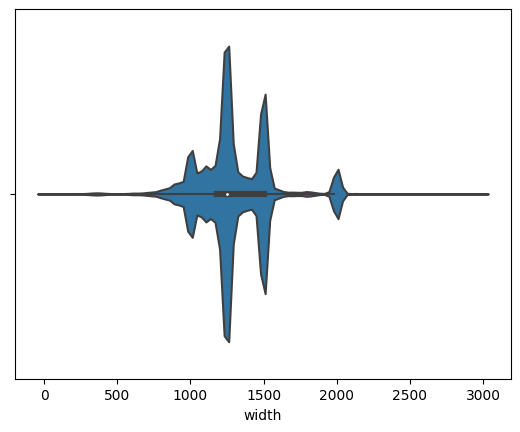

In [116]:
sns.violinplot(x=df['width'])

<Axes: xlabel='application'>

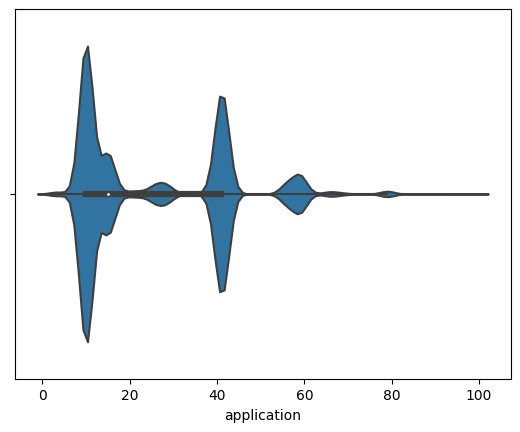

In [117]:
sns.violinplot(x=df['application'])

<Axes: xlabel='country'>

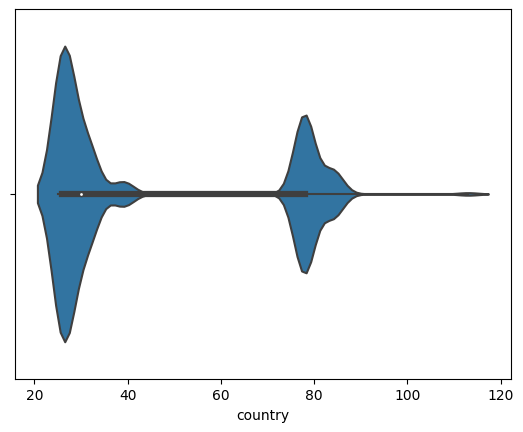

In [118]:
sns.violinplot(x=df['country'])

# **Exploratory data analysis**

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181670 non-null  object 
 2   quantity tons  181672 non-null  float64
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181670 non-null  object 
 13  selling_price  181672 non-null  float64
dtypes: float64(7), int64(1), object(6)
memory usage: 19.4+ MB


In [120]:
df.isnull().sum()

id                   2
item_date            3
quantity tons        1
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        3
selling_price        1
dtype: int64

In [121]:
df['material_ref'].fillna('unknown', inplace=True)

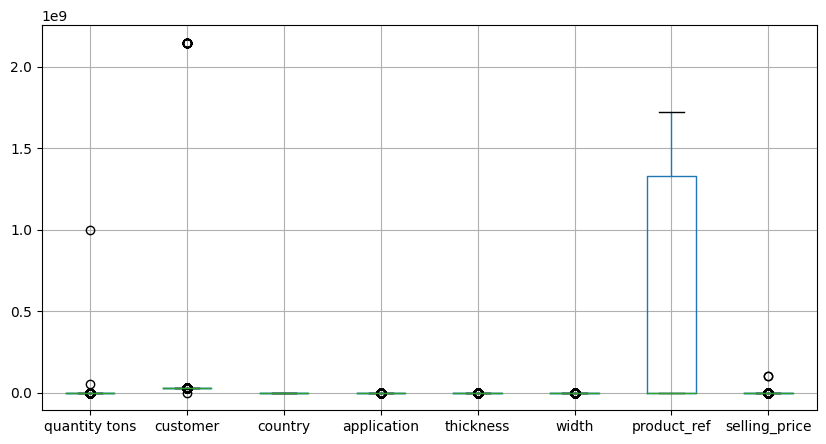

In [122]:
from matplotlib import figure
figure = plt.figure(figsize=(10,5))
df.boxplot()
plt.show()

In [123]:
df = df.dropna()

In [124]:
df.isnull().sum()

id               0
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [125]:
df.isnull().sum()

id               0
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [126]:
dfr = df.copy()

In [127]:
a = dfr['quantity tons'] <= 0
a.sum()
dfr.loc[a, 'quantity tons'] = np.nan

a = dfr['selling_price'] <= 0
a.sum()
dfr.loc[a, 'selling_price'] = np.nan

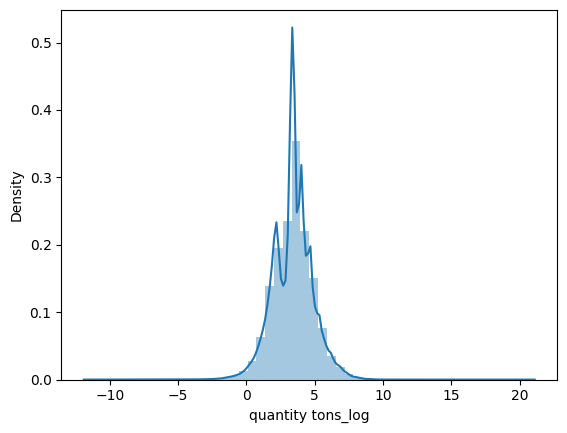

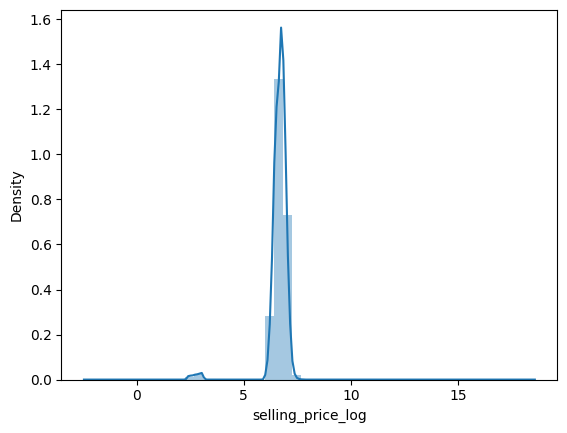

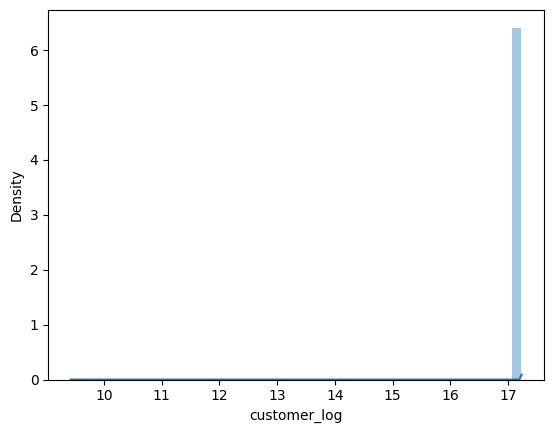

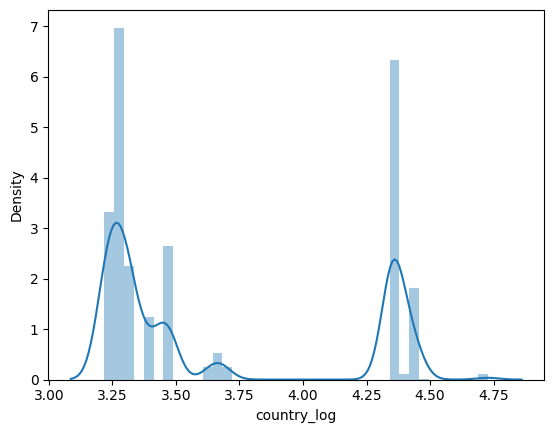

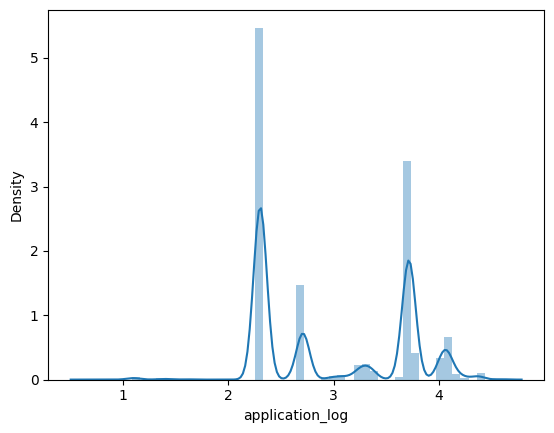

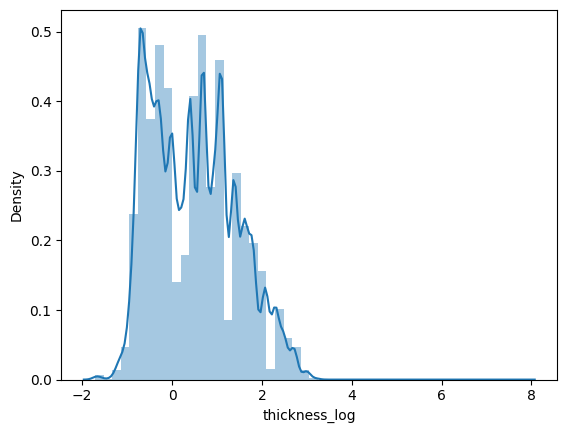

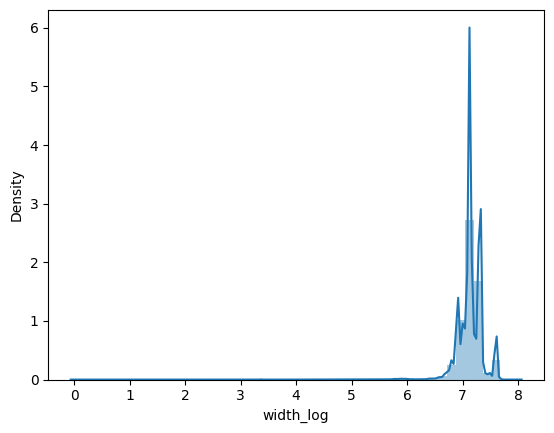

In [128]:
dfr['quantity tons_log'] = np.log(dfr['quantity tons'])
sns.distplot(dfr['quantity tons_log'])
plt.show()

dfr['selling_price_log'] = np.log(dfr['selling_price'])
sns.distplot(dfr['selling_price_log'])
plt.show()

dfr['customer_log'] = np.log(dfr['customer'])
sns.distplot(dfr['customer_log'])
plt.show()

dfr['country_log'] = np.log(dfr['country'])
sns.distplot(dfr['country_log'])
plt.show()

dfr['application_log'] = np.log(dfr['application'])
sns.distplot(dfr['application_log'])
plt.show()

dfr['thickness_log'] = np.log(dfr['thickness'])
sns.distplot(dfr['thickness_log'])
plt.show()

dfr['width_log'] = np.log(dfr['width'])
sns.distplot(dfr['width_log'])
plt.show()

In [129]:
dfr.head(3)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,...,product_ref,delivery date,selling_price,quantity tons_log,selling_price_log,customer_log,country_log,application_log,thickness_log,width_log
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,...,1670798778,2021-07-01,854.00,3.991779,6.749931,17.221905,3.332205,2.302585,0.693147,7.313220
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,...,1668701718,2021-04-01,1047.00,6.643822,6.953684,17.223450,3.218876,3.713572,-0.223144,7.098376
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,...,628377,2021-01-01,644.33,5.956169,6.468211,17.221827,3.401197,3.332205,-0.967584,6.858565


In [130]:
dfr = dfr.dropna()

In [131]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

In [132]:
ss = StandardScaler()

In [133]:
oe = OrdinalEncoder()
dfr.status = oe.fit_transform(dfr[['status']])
dfr['item type'] = oe.fit_transform(dfr[['item type']])

In [134]:
dfr.columns

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price', 'quantity tons_log',
       'selling_price_log', 'customer_log', 'country_log', 'application_log',
       'thickness_log', 'width_log'],
      dtype='object')

In [135]:
X = dfr[[ 'item type', 'quantity tons', 'customer_log', 'country_log', 'application_log', 'thickness_log', 'width_log', 'status', 'product_ref']]
y = dfr['selling_price_log']

In [136]:
X = ss.fit_transform(X)

In [137]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(145296, 9)
(36324, 9)
(145296,)
(36324,)


In [138]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

In [139]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [141]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.08085504472700533
0.0814985489022193


In [142]:
rf = RandomForestRegressor(n_estimators = 20, max_depth = 4, random_state = 42)
rf.fit(X_train, y_train)
print(rf.score(X_train, y_train))
print(rf.score(X_test,y_test))

0.8756818996318272
0.8855817269814519


In [143]:
gbr = GradientBoostingRegressor(n_estimators = 20, max_depth = 4, random_state = 42)
gbr.fit(X_train, y_train)
print(gbr.score(X_train, y_train))
print(gbr.score(X_test,y_test))

0.8673271772754237
0.8770917570300938


In [144]:
gbr

GradientBoostingRegressor(max_depth=4, n_estimators=20, random_state=42)

In [145]:
dtr = DecisionTreeRegressor()

param_grid = {'max_depth': [2, 5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['auto', 'sqrt', 'log2']}

grid_search = GridSearchCV(estimator=dtr, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)


Best hyperparameters: {'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 10}


In [146]:
print(best_model)

DecisionTreeRegressor(max_depth=20, max_features='auto', min_samples_leaf=4,
                      min_samples_split=10)


In [147]:
print(best_model.score(X_test, y_test))


0.9254663228658293


In [148]:
mse = mean_squared_error(y_test, y_pred)
print(mse)

0.023913935436673504


In [149]:
r2 = r2_score(y_test, y_pred)
print(r2)

0.9254663228658293


In [150]:
mae = mean_absolute_error(y_test, y_pred)
print(mae)

0.11354061425246001


Classification

In [167]:
dfc = df.copy()

In [168]:
dfc.head(3)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,2021-04-01,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33


In [169]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181631 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181631 non-null  object 
 1   item_date      181631 non-null  object 
 2   quantity tons  181631 non-null  float64
 3   customer       181631 non-null  float64
 4   country        181631 non-null  float64
 5   status         181631 non-null  object 
 6   item type      181631 non-null  object 
 7   application    181631 non-null  float64
 8   thickness      181631 non-null  float64
 9   width          181631 non-null  float64
 10  material_ref   181631 non-null  object 
 11  product_ref    181631 non-null  int64  
 12  delivery date  181631 non-null  object 
 13  selling_price  181631 non-null  float64
dtypes: float64(7), int64(1), object(6)
memory usage: 20.8+ MB


In [170]:
dfc.isnull().sum()

id               0
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [171]:
dfc.describe()

,quantity tons,customer,country,application,thickness,width,product_ref,selling_price
count,1.816310e+05,1.816310e+05,181631.000000,181631.000000,181631.000000,181631.000000,1.816310e+05,1.816310e+05
mean,5.876231e+03,3.023251e+07,44.893201,25.615974,2.564198,1295.267162,4.740398e+08,1.918367e+03
std,2.349346e+06,1.005626e+05,24.404303,17.753821,6.572637,261.644078,7.175426e+08,3.318331e+05
min,-2.000000e+03,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,-1.160000e+03
25%,1.096801e+01,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,6.690000e+02
50%,3.036395e+01,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,8.120000e+02
75%,6.716187e+01,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,9.530000e+02
max,1.000000e+09,3.040818e+07,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,1.000010e+08


In [172]:
a = dfc['quantity tons'] <= 0
print(a.sum())
dfc.loc[a, 'quantity tons'] = np.nan

a = dfc['selling_price'] <= 0
print(a.sum())
dfc.loc[a, 'selling_price'] = np.nan

a = dfc['customer'] <= 0
print(a.sum())

a = dfc['country'] <= 0
print(a.sum())

a = dfc['application'] <= 0
print(a.sum())

a = dfc['thickness'] <= 0
print(a.sum())

a = dfc['width'] <= 0
print(a.sum())

a = dfc['product_ref'] <= 0
print(a.sum())

4
7
0
0
0
0
0
0


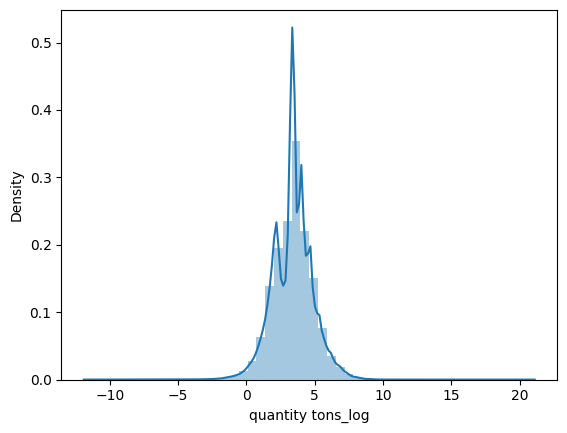

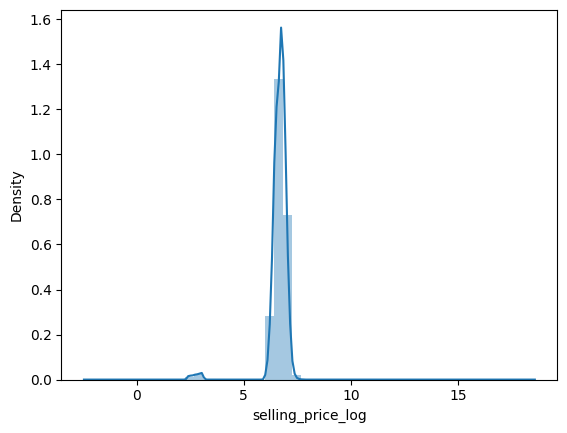

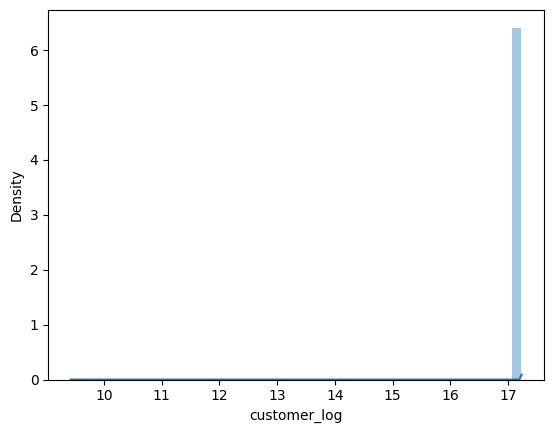

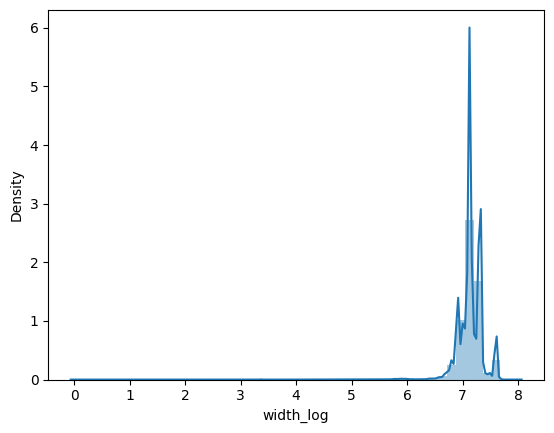

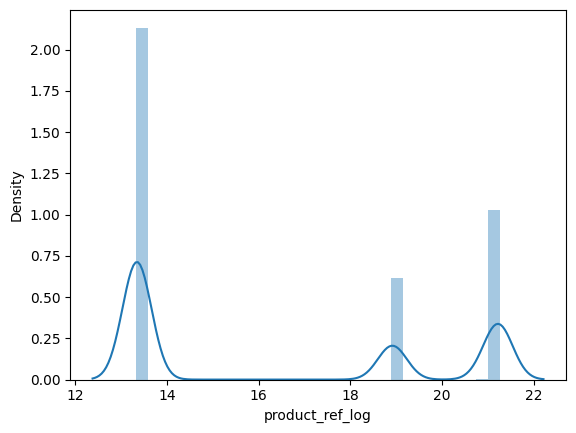

In [173]:
dfc['quantity tons_log'] = np.log(dfc['quantity tons'])
sns.distplot(dfc['quantity tons_log'])
plt.show()

dfc['selling_price_log'] = np.log(dfc['selling_price'])
sns.distplot(dfc['selling_price_log'])
plt.show()

dfc['customer_log'] = np.log(dfc['customer'])
sns.distplot(dfc['customer_log'])
plt.show()

dfc['width_log'] = np.log(dfc['width'])
sns.distplot(dfc['width_log'])
plt.show()

dfc['product_ref_log'] = np.log(dfc['product_ref'])
sns.distplot(dfc['product_ref_log'])
plt.show()

In [174]:
dfc.isnull().sum()

id                   0
item_date            0
quantity tons        4
customer             0
country              0
status               0
item type            0
application          0
thickness            0
width                0
material_ref         0
product_ref          0
delivery date        0
selling_price        7
quantity tons_log    4
selling_price_log    7
customer_log         0
width_log            0
product_ref_log      0
dtype: int64

In [175]:
dfc = dfc.dropna()

In [176]:
dfc['status'].value_counts()

Won                115996
Lost                34431
Not lost for AM     19566
Revised              4276
To be approved       4167
Draft                3120
Offered                53
Offerable              10
Wonderful               1
Name: status, dtype: int64

In [177]:
dfc = dfc[dfc['status'].isin(['Won', 'Lost'])]

In [178]:
dfc.columns

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price', 'quantity tons_log',
       'selling_price_log', 'customer_log', 'width_log', 'product_ref_log'],
      dtype='object')

In [179]:
dfc.status = oe.fit_transform(dfc[['status']])
dfc['item type'] = oe.fit_transform(dfc[['item type']])


In [180]:
X = dfc[[ 'item type', 'quantity tons_log', 'selling_price_log', 'customer_log', 'country', 'application', 'thickness', 'width_log', 'product_ref']]
y = dfc['status']

In [181]:
ss.fit_transform(X)

array([[ 0.76981153,  0.42911287,  0.26119377, ..., -0.19868095,
         0.72318065,  1.66740264],
       [ 0.76981153,  2.26866168,  1.10632675, ..., -0.59487609,
        -0.19960981,  1.66447894],
       [ 1.72296431,  1.79168157, -0.90733378, ..., -0.73354439,
        -1.22963238, -0.66113486],
       ...,
       [ 0.76981153,  1.36286621, -1.27974605, ..., -0.5453517 ,
         0.72318065, -0.43316611],
       [ 0.76981153, -1.33844531, -1.07368561, ..., -0.62459073,
        -0.05991782, -0.43316611],
       [ 0.76981153,  1.82766312, -1.15488554, ..., -0.62459073,
        -0.0944172 , -0.43316611]])

In [182]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120341, 9)
(30086, 9)
(120341,)
(30086,)


In [183]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [185]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
print(dtc.score(X_train, y_train))
print(dtc.score(X_test, y_test))

1.0
0.9142458286246095


In [193]:
y_predict = dtc.predict(X_test)
print(mean_squared_error(y_test, y_predict))

0.08575417137539054


In [186]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
print(rfc.score(X_train, y_train))
# pred = rfc.predict(X_test)
print(rfc.score(X_test, y_test))

0.9999916902801207
0.9341886591770259


In [194]:
y_predict = rfc.predict(X_test)
print(mean_squared_error(y_test, y_predict))

0.06581134082297414


In [189]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
print(gbc.score(X_train, y_train))
print(gbc.score(X_test, y_test))

0.8316616946842722
0.829355846573157


In [195]:
y_predict = gbc.predict(X_test)
print(mean_squared_error(y_test, y_predict))

0.17064415342684305


In [190]:
knc = KNeighborsClassifier()
knc.fit(X_train, y_train)
print(knc.score(X_train, y_train))
print(knc.score(X_test, y_test))

0.9157976084626187
0.8733297879412352


In [196]:
y_predict = knc.predict(X_test)
print(mean_squared_error(y_test, y_predict))

0.12667021205876489


In [192]:
from sklearn.metrics import confusion_matrix, auc, accuracy_score

In [197]:
cm = confusion_matrix(y_test, y_predict)

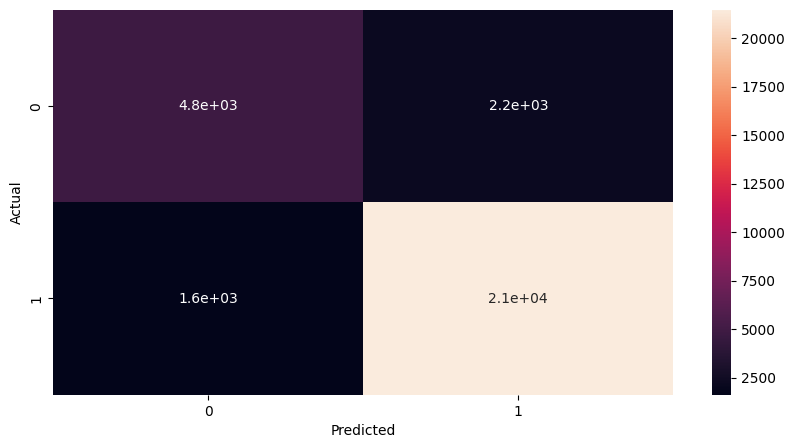

In [200]:
plt.figure(figsize=(10,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()